## Importando dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()

C:\Users\Leandro\AppData\Local\Temp\ipykernel_16400\2438792286.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Características gerais da base de dados

In [3]:
dados.shape

(32960, 9)

In [4]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
dados[['Bairro', 'Valor']].head()

,Bairro,Valor
0,Copacabana,1700.0
1,Jardim Botânico,7000.0
2,Barra da Tijuca,5200.0
3,Centro,800.0
4,Higienópolis,800.0


## Análise exploratória de dados

### Valor médio por tipo de apartamento

In [7]:
dados.Valor.mean()

12952.659715265761

In [8]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [9]:
tipos = dados.groupby('Tipo').mean(numeric_only=True).reset_index()
tipos[['Tipo', 'Valor']].head()

,Tipo,Valor
0,Apartamento,4744.614648
1,Box/Garagem,1899.756098
2,Casa,6793.454922
3,Casa Comercial,14478.264151
4,Casa de Condomínio,11952.061245


In [10]:
dados.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [11]:
apartamentos = dados.query("Tipo=='Apartamento'")
apartamentos.Valor.mean()

4744.614647887324

In [12]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

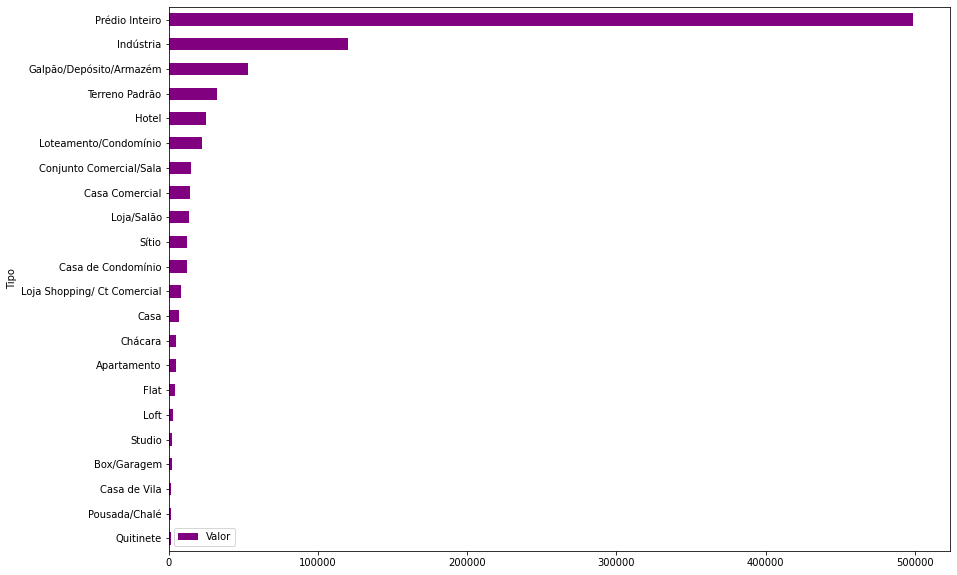

In [13]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='purple')

### Removendo imóveis comerciais

In [14]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão', 'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão', 'Loja Shopping/ Ct Comercial', 'Box/Garagem',
                      'Chácara', 'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria']

In [15]:
dados.query("@imoveis_comerciais in Tipo").head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN


In [16]:
dados.query("@imoveis_comerciais not in Tipo").head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [17]:
df_residencial = dados.query("@imoveis_comerciais not in Tipo")
df_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

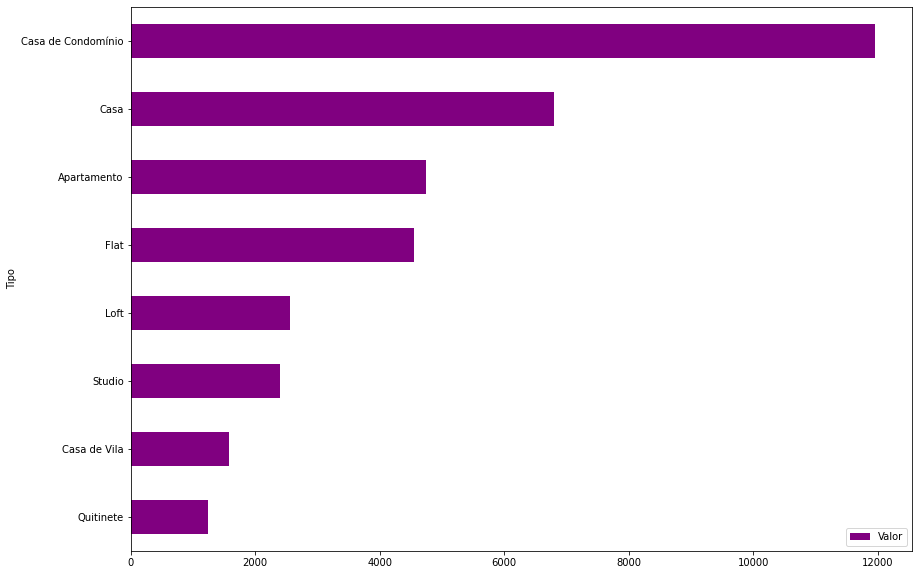

In [18]:
df_residencial_preco_tipo = df_residencial.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_residencial_preco_tipo.plot(kind='barh', figsize=(14, 10), color='purple')

### Pegando percentual de cada tipo presente no novo DF

In [19]:
df_residencial.Tipo.value_counts()


Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [20]:
df_residencial.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [21]:
df_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Tipos', ylabel='Percentual'>

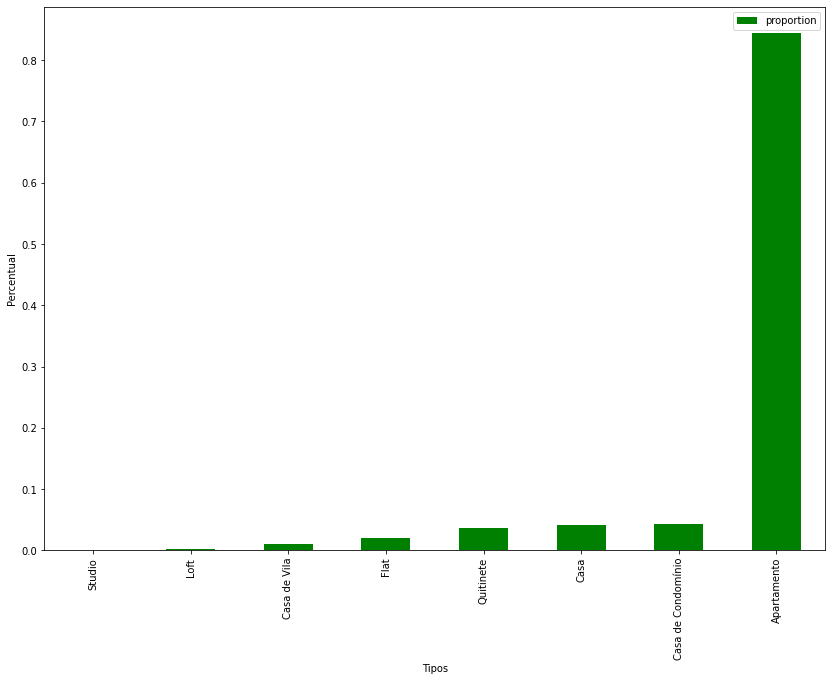

In [22]:
df_percentual_tipo = df_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')

df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color='green',
                        xlabel='Tipos', ylabel='Percentual')

### Selecionando apenas imóveis tipo apartamento

In [23]:
df_apartamentos = dados.query("Tipo=='Apartamento'")
df_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Tratando dados nulos

In [31]:
df_apartamentos.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [30]:
df_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [32]:
df_apartamentos = df_apartamentos.fillna(0)

In [35]:
df_apartamentos.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

### Removendo registros

In [38]:
df_apartamentos.query('Valor==0 | Condominio==0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [39]:
df_apartamentos.query('Valor==0 | Condominio==0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [40]:
registros_remover = df_apartamentos.query('Valor==0 | Condominio==0').index

In [41]:
df_apartamentos.drop(registros_remover, axis=0, inplace=True)

In [42]:
df_apartamentos.query('Valor==0 | Condominio==0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [43]:
df_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [44]:
df_apartamentos.Tipo.unique()

array(['Apartamento'], dtype=object)

In [45]:
df_apartamentos.drop('Tipo', axis=1, inplace=True)

In [46]:
df_apartamentos.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


### Aplicando filtros

In [48]:
df_apartamentos.Quartos == 1

3         True
4         True
6        False
11       False
12       False
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 18780, dtype: bool

In [49]:
selecao1 = df_apartamentos.Quartos == 1
df_apartamentos[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [53]:
selecao2 = df_apartamentos.Valor < 1200
df_apartamentos[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [56]:
selecao_final = (selecao1) & (selecao2)
df_apartamentos[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [58]:
selecao = (df_apartamentos.Quartos >= 2) & (df_apartamentos.Valor < 3000) & (df_apartamentos.Area > 70)
df_apartamentos[selecao]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


### Salvando os dados

In [59]:
df_apartamentos.to_csv('dados_apartamentos.csv')

In [60]:
pd.read_csv('dados_apartamentos.csv')

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [61]:
df_apartamentos.to_csv('dados_apartamentos.csv', index=False)
pd.read_csv('dados_apartamentos.csv')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [63]:
df_apartamentos.to_csv('dados_apartamentos.csv', index=False, sep=';')
pd.read_csv('dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Manipulando dados

In [64]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [68]:
dados['Valor_por_mes'] = dados.Valor + dados.Condominio
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [70]:
dados['Valor_por_ano'] = (dados.Valor_por_mes * 12) + dados.IPTU
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


In [73]:
dados['Descricao'] = dados.Tipo + ' em ' + dados.Bairro
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis


In [79]:
dados['Descricao'] = dados.Tipo + ' em ' + dados.Bairro + ' com ' + \
                     dados.Quartos.astype(str) + ' quarto(s)' + ' e ' + dados.Vagas.astype(str) + ' vaga(s) de garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [80]:
dados['Possui_suite'] = dados.Suites.apply(lambda x: "Sim" if x>0 else "Não")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,Não
